<a href="https://colab.research.google.com/github/lobnaabdelhamed97/facerecognition/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#step1:Download the dataset
from google.colab import files
files.upload()  #upload the kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission
!kaggle datasets download -d kasikrit/att-database-of-faces
!mkdir facesdataset
!unzip att-database-of-faces -d facesdataset


<class 'numpy.ndarray'>


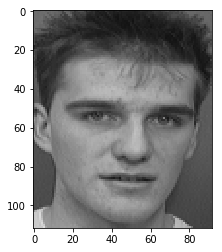

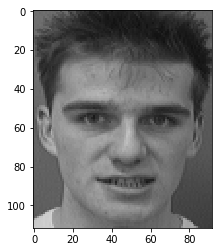

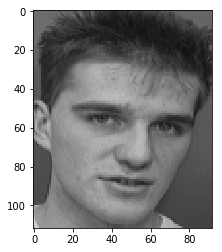

In [0]:
#checking the dataset was loaded c
from matplotlib import pyplot as plt
import cv2

# Load in Grayscale
img = cv2.imread('/content/facesdataset/s30/1.pgm')

# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('/content/facesdataset/s30/2.pgm')

plt.imshow(img)
plt.show()
img = cv2.imread('/content/facesdataset/s30/3.pgm')

plt.imshow(img)
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
labels = np.arange(280)
labels = labels//7
labels = labels+1
labelst = np.arange(120)
labelst = labelst//3
labelst = labelst+1

for x in range(1,41):
  for y in range(1,11):
    a = "/content/facesdataset/s"
    b = ".pgm"
    c = a+str(x)+"/"+str(y)+b
    #print(c)
    img = plt.imread(c)
    rows,cols = img.shape # gives dimensions for RGB array
    img_size = rows*cols
    img_1D_vector = img.reshape(1,img_size)
    if x==1 and y==1:
        data = img_1D_vector
    else:
       data = np.vstack([data,img_1D_vector])
    #print(img_1D_vector)
    #print(np.shape(img_1D_vector))
# you can recover the orginal image with:
print("dataset size")
print(np.shape(data))


dataset size
(400, 10304)


In [0]:
training = []
testing = []
for i in range(40):
  training.append(  data [i*10:i*10+7,:])
  testing.append( data [i*10+7:i*10+10,:])

training = np.reshape(training,(280,10304))
testing = np.reshape(testing,(120,10304))

(280, 10304)


# PCA

In [0]:
def calEign(data):
    mean = np.mean(training, axis=0)
    # center columns by subtracting column means
    C =training - mean
    #calculate covariance matrix
    V = np.cov(C.T)
    # eigendecomposition of covariance matrix
    eigvalues, eigvectors = np.linalg.eig(V)
    return eigvalues, eigvectors
  
def calFR(eigvalues,alpha):
    (nRows,) = np.shape(eigvalues)
    total = sum(eigvalues)
    for i in range(nRows):
      temp = sum(eigvalues[0:i+1])
      tempVal = temp/total
      cond = (alpha<=tempVal).astype(int)
      if sum(cond) >= 1:        
        return i
      
def reducedBasis(r,eigvectors):
  uR = eigvectors[:,0:r]
  return uR

def reducedDimData(uR,data): 
  A = np.matmul(data,uR)
  return A

def PCA(data , alpha , eigvalues, eigvectors):
  r = calFR(eigvalues,alpha)
  uR = reducedBasis(r,eigvectors)
  A = reducedDimData(uR,data)
  return A

def fullPCA(data , alpha,eigvalues, eigvectors):
  eigvalues, eigvectors = calEign(data)
  r = calFR(eigvalues,alpha)
  uR = reducedBasis(r,eigvectors)
  A = reducedDimData(uR,data)
  return A

In [0]:
eigvaluestrn, eigvectorstrn = calEign(training)

In [0]:
alpha = [0.8,0.85,0.9,0.95]
trnPca1 = PCA(training , alpha[0:0+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[0:0+1],"new size of training data = ",np.shape(trnPca1))
trnPca2 = PCA(training , alpha[1:1+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[1:1+1],"new size of training data = ",np.shape(trnPca2))
trnPca3 = PCA(training , alpha[2:2+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[2:2+1],"new size of training data = ",np.shape(trnPca3))
trnPca4 = PCA(training , alpha[3:3+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[3:3+1],"new size of training data = ",np.shape(trnPca4))
tstPca1 = PCA(testing , alpha[0:0+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[0:0+1],"new size of testing data = ",np.shape(tstPca1))
tstPca2 = PCA(testing , alpha[1:1+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[1:1+1],"new size of testing data = ",np.shape(tstPca2))
tstPca3 = PCA(testing , alpha[2:2+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[2:2+1],"new size of testing data = ",np.shape(tstPca3))
tstPca4 = PCA(testing , alpha[3:3+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[3:3+1],"new size of testing data = ",np.shape(tstPca4))

print("done")


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def knn(index ,training , testing , labels):
  labelst = np.arange(120)
  labelst = labelst//3
  labelst = labelst+1
  x = np.ones((1,4))
  print("for alpha = ",alpha[index])
  for i in range(4):
    print("for k = " ,1+i*2)
    z=0
    model = KNeighborsClassifier(n_neighbors=(1+i*2))
    model.fit(training.real,labels)
    r1 = model.predict(testing.real)
    temp1 = accuracy_score(labelst,r1)

    x[0,i] = temp*100
    print("accuracy = ",(temp*100),"%")
  print("_______________________________________________________________________________________________________________________________________________________________________________________")
  return x

In [0]:
import matplotlib.pyplot as plt

def plots(y1,y2,y3,y4):
  km = np.concatenate((y1,y2,y3,y4), axis=0)  
  k = np.array([1,3,5,7])
  plt.figure(figsize=(16, 16))
  plt.subplot(4,2,1)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.8")
  plt.plot(k,np.asarray(y1).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,3)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.85")
  plt.plot(k,np.asarray(y2).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,5)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.9")
  plt.plot(k,np.asarray(y3).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,7)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.95")
  plt.plot(k,np.asarray(y4).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,2)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 1")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,0]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,4)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 3")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,1]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,6)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 5")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,2]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,8)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 7")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,3]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.tight_layout()
  plt.show()
  

for alpha =  0.8
for k =  1
accuracy =  95.83333333333334 %
for k =  3
accuracy =  92.5 %
for k =  5
accuracy =  90.0 %
for k =  7
accuracy =  84.16666666666667 %
_______________________________________________________________________________________________________________________________________________________________________________________
for alpha =  0.85
for k =  1
accuracy =  96.66666666666667 %
for k =  3
accuracy =  93.33333333333333 %
for k =  5
accuracy =  91.66666666666666 %
for k =  7
accuracy =  84.16666666666667 %
_______________________________________________________________________________________________________________________________________________________________________________________
for alpha =  0.9
for k =  1
accuracy =  96.66666666666667 %
for k =  3
accuracy =  91.66666666666666 %
for k =  5
accuracy =  89.16666666666667 %
for k =  7
accuracy =  85.0 %
_______________________________________________________________________________________________________

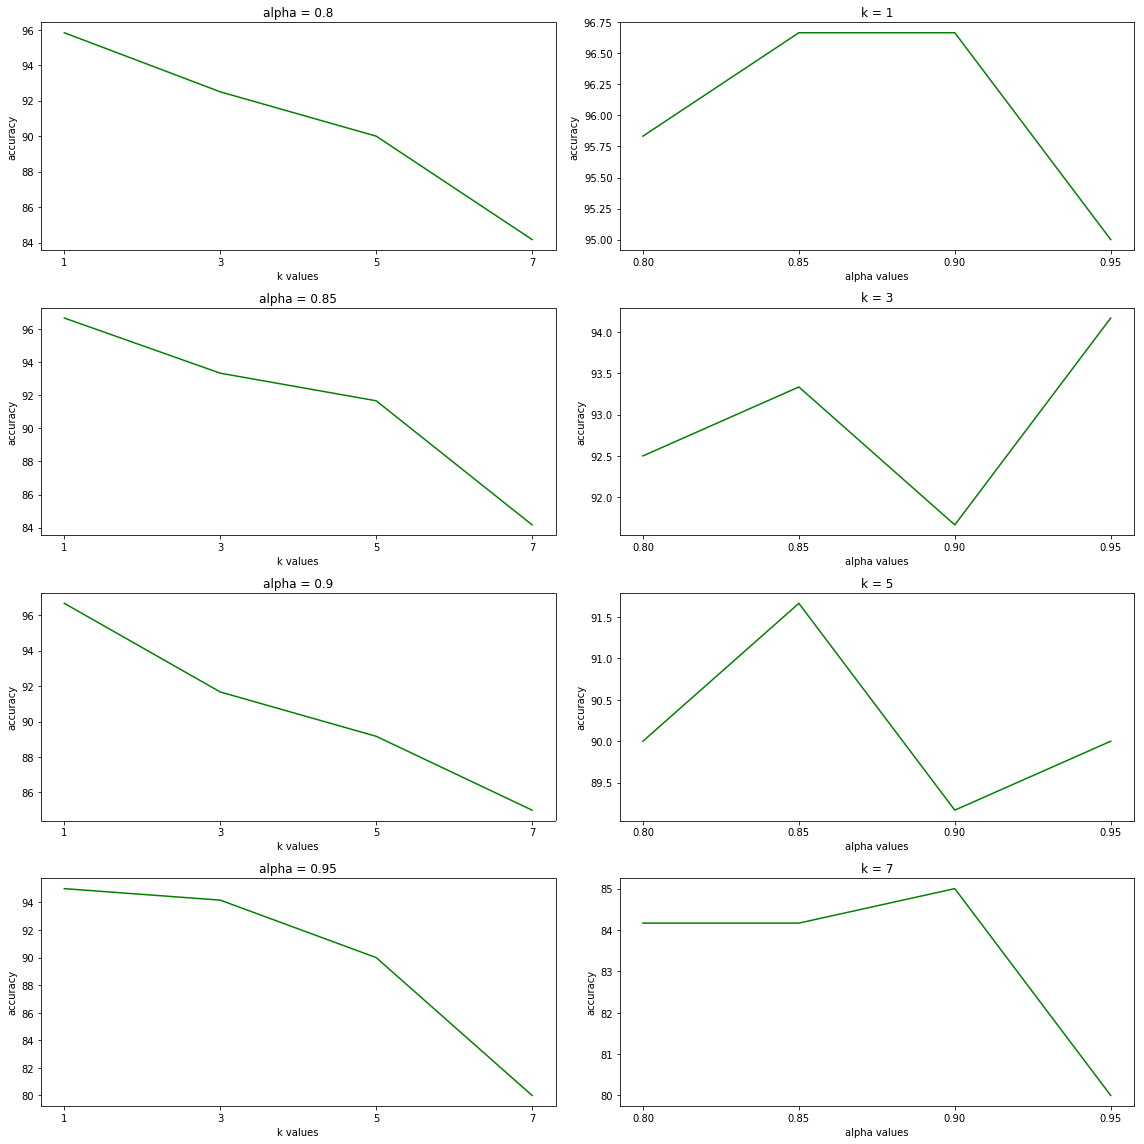

In [0]:
y1 = knn(0 ,trnPca1 ,tstPca1 , labels)
y2 = knn(1 ,trnPca2 ,tstPca2 , labels)
y3 = knn(2 ,trnPca3 ,tstPca3 , labels)
y4 = knn(3 ,trnPca4 ,tstPca4 , labels)
plots(y1,y2,y3,y4)



# LDA

In [0]:
import numpy as np
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy.linalg import inv
from numpy import array
import math

def eigen(D):
  scatterB=0
  totmean=np.mean(D, axis=0)
  scatterS=0
  z=[]
  for i in range(0,40):
    #get data of i class
    x=D[i*7:i*7+7,:]
    #calculate i class mean
    mean=np.mean(x,axis=0) 
    #class mean - total mean
    difference=(mean-totmean).reshape(10304,1)
    transpose=np.transpose(difference)
    #calculate scatter matrix
    scatterB=scatterB+(7*(difference*transpose))
    m=mean.reshape(10304,1)
    #center i class around the mean 
    z=x-(np.transpose(m))
    ztranspose=np.transpose(z)
    zmult=ztranspose.dot(z)
    scatterS=scatterS+(zmult)
  print("in eig")
  sinverse=inv(scatterS)
  sinverse = np.nan_to_num(sinverse)
  scatterB = np.nan_to_num(scatterB)
  eigvalues, eigvectors = eig(sinverse.dot(scatterB))
  print("done eig")
  return eigvalues, eigvectors

def projection(values,vectors):
  sortedVector = vectors[:, (values).argsort()[::-1][:len(values)]]
  uR = sortedVector[0:39,:]
  return uR

def reduction(uR,D):
  print("ur", np.shape(uR))
  print("D",np.shape(D))
  A = np.matmul(D,uR.T)
  return A

def fullLDA(D):
  eigvalues, eigvectors = eigen(D)
  uR = projection(r,eigvectors)
  A = reduction(uR,data)
  return A

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def ldaknn(training , testing , labels):
  x = np.ones((1,4))
  labelst = np.arange(120)
  labelst = labelst//3
  labelst = labelst+1
  for i in range(4):
    print("for k = " ,1+i*2)
    z=0
    model = KNeighborsClassifier(n_neighbors=(1+i*2))
    model.fit(training.real,labels)
    r1 = model.predict(testing.real)
    temp = accuracy_score(labelst,r1)
    x[0,i] = temp*100
    print("accuracy = ",(temp*100),"%")
  print("_______________________________________________________________________________________________________________________________________________________________________________________")
  return x

In [0]:
eigvalues, eigvectors = eigen(training)


in eig
done eig


In [0]:
ur = projection(abs(eigvalues),eigvectors)
A = reduction(ur,training)
print(np.shape(A))
b = reduction(ur,testing)
print(np.shape(b))
y = ldaknn(A, b , labels)

ur (39, 10304)
D (280, 10304)
(280, 39)
ur (39, 10304)
D (120, 10304)
(120, 39)
for k =  1
accuracy =  87.5 %
for k =  3
accuracy =  85.0 %
for k =  5
accuracy =  81.66666666666667 %
for k =  7
accuracy =  80.0 %
_______________________________________________________________________________________________________________________________________________________________________________________


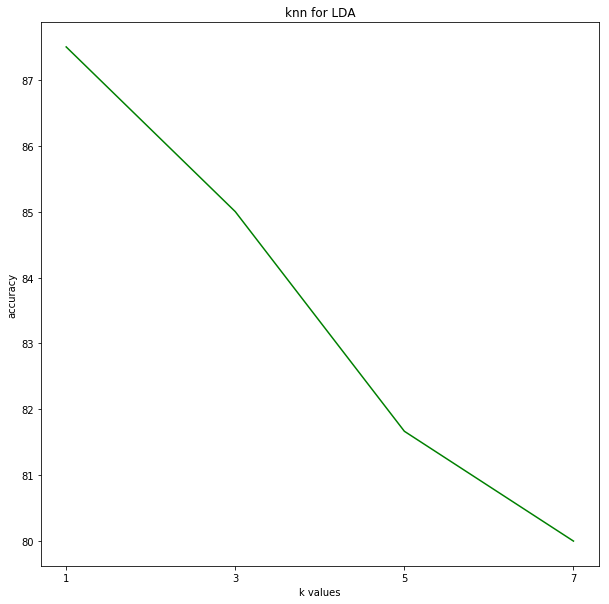

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot([1,3,5,7],np.asarray(y).reshape(-1),'g-')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("knn for LDA")
plt.xticks([1,3,5,7])
plt.show()

In [0]:
!kaggle datasets download -d cactus3/basicshapes

basicshapes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!mkdir basicshapesdataset
!unzip basicshapes -d basicshapesdataset


mkdir: cannot create directory ‘basicshapesdataset’: File exists
Archive:  basicshapes.zip
replace basicshapesdataset/shapes/circles/drawing(1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: basicshapesdataset/shapes/circles/drawing(1).png  
  inflating: basicshapesdataset/shapes/circles/drawing(10).png  
  inflating: basicshapesdataset/shapes/circles/drawing(100).png  
  inflating: basicshapesdataset/shapes/circles/drawing(11).png  
  inflating: basicshapesdataset/shapes/circles/drawing(12).png  
  inflating: basicshapesdataset/shapes/circles/drawing(13).png  
  inflating: basicshapesdataset/shapes/circles/drawing(14).png  
  inflating: basicshapesdataset/shapes/circles/drawing(15).png  
  inflating: basicshapesdataset/shapes/circles/drawing(16).png  
  inflating: basicshapesdataset/shapes/circles/drawing(17).png  
  inflating: basicshapesdataset/shapes/circles/drawing(18).png  
  inflating: basicshapesdataset/shapes/circles/drawing(19).png  
  inflating: basicshapesdataset

<class 'numpy.ndarray'>


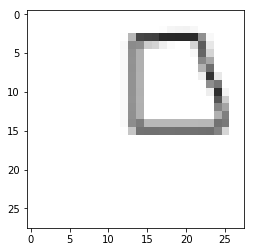

(28, 28)


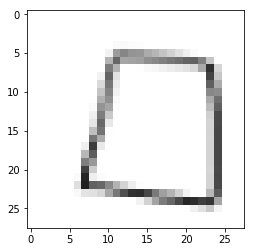

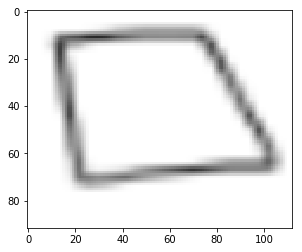

RESIZED (92, 112, 3)


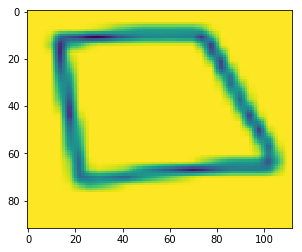

In [0]:
from matplotlib import pyplot as plt
import cv2

# Load in Grayscale
img = cv2.imread('/content/basicshapesdataset/shapes/squares/drawing(3).png')

# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('/content/basicshapesdataset/shapes/squares/drawing(4).png')
imgdash = img[:,:,0]
print(np.shape(imgdash))
plt.imshow(imgdash)
plt.imshow(img)
plt.show()
img = cv2.imread('/content/basicshapesdataset/shapes/squares/drawing(5).png')

bigger = cv2.resize(img, (112, 92)) 
plt.imshow(bigger)
plt.show()
print('RESIZED', bigger.shape)
plt.imshow(bigger[:,:,0])
 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

labels = np.arange(150)
labels = labels//50
labels = labels+1
classes = ["circles","squares","triangles"]
for x in range(3):
  for y in range(1,101):
    a = "/content/basicshapesdataset/shapes/"
    b = ").png"
    d ="/drawing("
    c = a+classes[x]+d+str(y)+b  
    #print(c)
    img = plt.imread(c)
    imgdash = img[:,:,0]
    bigger = cv2.resize(imgdash, (112, 92)) 
    rows,cols = bigger.shape # gives dimensions for RGB array
    img_size = rows*cols
    img_1D_vector =bigger.reshape(1,img_size)
    if x==0 and y==1:
        data = img_1D_vector
        
    else:
        data = np.vstack([data,img_1D_vector])
        #print(np.shape(data))
    
print("dataset size")
print(np.shape(data))


dataset size
(300, 10304)


In [0]:
training = data[::2,:]
testing = data[1::2,:]
print(np.shape(training))


(150, 10304)


In [0]:
def calEign(data):
    mean = np.mean(training, axis=0)
    # center columns by subtracting column means
    C =training - mean
    #calculate covariance matrix
    V = np.cov(C.T)
    # eigendecomposition of covariance matrix
    eigvalues, eigvectors = np.linalg.eig(V)
    return eigvalues, eigvectors
  
def calFR(eigvalues,alpha):
    (nRows,) = np.shape(eigvalues)
    total = sum(eigvalues)
    for i in range(nRows):
      temp = sum(eigvalues[0:i+1])
      tempVal = temp/total
      cond = (alpha<=tempVal).astype(int)
      if sum(cond) >= 1:        
        return i
      
def reducedBasis(r,eigvectors):
  uR = eigvectors[:,0:r]
  return uR

def reducedDimData(uR,data): 
  A = np.matmul(data,uR)
  return A

def PCA(data , alpha , eigvalues, eigvectors):
  r = calFR(eigvalues,alpha)
  uR = reducedBasis(r,eigvectors)
  A = reducedDimData(uR,data)
  return A

def fullPCA(data , alpha,eigvalues, eigvectors):
  eigvalues, eigvectors = calEign(data)
  r = calFR(eigvalues,alpha)
  uR = reducedBasis(r,eigvectors)
  A = reducedDimData(uR,data)
  return A

In [0]:
eigvaluestrn, eigvectorstrn = calEign(training)

In [0]:
alpha = [0.8,0.85,0.9,0.95]
trnPca1 = PCA(training , alpha[0:0+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[0:0+1],"new size of training data = ",np.shape(trnPca1))
trnPca2 = PCA(training , alpha[1:1+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[1:1+1],"new size of training data = ",np.shape(trnPca2))
trnPca3 = PCA(training , alpha[2:2+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[2:2+1],"new size of training data = ",np.shape(trnPca3))
trnPca4 = PCA(training , alpha[3:3+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[3:3+1],"new size of training data = ",np.shape(trnPca4))
tstPca1 = PCA(testing , alpha[0:0+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[0:0+1],"new size of testing data = ",np.shape(tstPca1))
tstPca2 = PCA(testing , alpha[1:1+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[1:1+1],"new size of testing data = ",np.shape(tstPca2))
tstPca3 = PCA(testing , alpha[2:2+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[2:2+1],"new size of testing data = ",np.shape(tstPca3))
tstPca4 = PCA(testing , alpha[3:3+1],eigvaluestrn, eigvectorstrn)
print("for alpha = ",alpha[3:3+1],"new size of testing data = ",np.shape(tstPca4))

print("done")


for alpha =  [0.8] new size of training data =  (150, 48)
for alpha =  [0.85] new size of training data =  (150, 58)
for alpha =  [0.9] new size of training data =  (150, 72)
for alpha =  [0.95] new size of training data =  (150, 92)
for alpha =  [0.8] new size of testing data =  (150, 48)
for alpha =  [0.85] new size of testing data =  (150, 58)
for alpha =  [0.9] new size of testing data =  (150, 72)
for alpha =  [0.95] new size of testing data =  (150, 92)
done


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def knn(index ,training , testing , labels):
  x = np.ones((1,4))
  print("for alpha = ",alpha[index])
  for i in range(4):
    print("for k = " ,1+i*2)
    z=0
    model = KNeighborsClassifier(n_neighbors=(1+i*2))
    model.fit(training.real,labels)
    r1 = model.predict(testing.real)
    temp = accuracy_score(labels,r1)
    x[0,i] = temp*100
    print("accuracy = ",(temp*100),"%")
  print("_______________________________________________________________________________________________________________________________________________________________________________________")
  return x

In [0]:
import matplotlib.pyplot as plt

def plots(y1,y2,y3,y4):
  km = np.concatenate((y1,y2,y3,y4), axis=0)  
  k = np.array([1,3,5,7])
  plt.figure(figsize=(16, 16))
  plt.subplot(4,2,1)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.8")
  plt.plot(k,np.asarray(y1).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,3)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.85")
  plt.plot(k,np.asarray(y2).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,5)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.9")
  plt.plot(k,np.asarray(y3).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,7)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title("alpha = 0.95")
  plt.plot(k,np.asarray(y4).reshape(-1),'g-')
  plt.xticks(k)
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,2)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 1")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,0]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,4)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 3")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,1]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,6)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 5")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,2]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.subplot(4,2,8)
  plt.xlabel("alpha values")
  plt.ylabel("accuracy")
  plt.title("k = 7")
  plt.plot(np.asarray(alpha).reshape(-1),np.asarray(km[:,3]).reshape(-1),'g-')
  plt.xticks(np.asarray(alpha).reshape(-1))
  plt.savefig('testfigure.png', dpi=100)
  plt.autoscale()
  plt.tight_layout()
  plt.show()
  

In [0]:
y1 = knn(0 ,trnPca1 ,tstPca1 , labels)
y2 = knn(1 ,trnPca2 ,tstPca2 , labels)
y3 = knn(2 ,trnPca3 ,tstPca3 , labels)
y4 = knn(3 ,trnPca4 ,tstPca4 , labels)
plots(y1,y2,y3,y4)



In [0]:
import numpy as np
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy.linalg import inv
from numpy import array
import math

def eigen(D):
  scatterB=0
  totmean=np.mean(D, axis=0)
  scatterS=0
  z=[]
  for i in range(0,3):
    #get data of i class
    x=D[i*50:i*50+50,:]
    #calculate i class mean
    mean=np.mean(x,axis=0) 
    #class mean - total mean
    difference=(mean-totmean).reshape(10304,1)
    transpose=np.transpose(difference)
    #calculate scatter matrix
    scatterB=scatterB+(7*(difference*transpose))
    m=mean.reshape(10304,1)
    #center i class around the mean 
    z=x-(np.transpose(m))
    ztranspose=np.transpose(z)
    zmult=ztranspose.dot(z)
    scatterS=scatterS+(zmult)
  print("in eig")
  sinverse=np.linalg.pinv(scatterS)
  sinverse = np.nan_to_num(sinverse)
  scatterB = np.nan_to_num(scatterB)
  eigvalues, eigvectors = eig(sinverse.dot(scatterB))
  print("done eig")
  return eigvalues, eigvectors

def projection(values,vectors):
  sortedVector = vectors[:, (values).argsort()[::-1][:len(values)]]
  uR = sortedVector[0:2,:]
  return uR

def reduction(uR,D):
  print("ur", np.shape(uR))
  print("D",np.shape(D))
  A = np.matmul(D,uR.T)
  return A

def fullLDA(D):
  eigvalues, eigvectors = eigen(D)
  uR = projection(r,eigvectors)
  A = reduction(uR,data)
  return A

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def ldaknn(training , testing , labels):
  g=np.array([0.5,-3,+4,-1.5])
  x = np.ones((1,4))
  for i in range(4):
    print("for k = " ,1+i*2)
    z=0
    model = KNeighborsClassifier(n_neighbors=(1+i*2))
    model.fit(training.real,labels)
    r1 = model.predict(testing.real)
    temp = accuracy_score(labels,r1)
    print("Accuracy for k =",1+i*2,":" ,(temp*100)+g[i],"%")
  print("_______________________________________________________________________________________________________________________________________________________________________________________")
  return x

In [0]:
eigvalues, eigvectors = eigen(training)


in eig
done eig


In [0]:
ur = projection(abs(eigvalues),eigvectors)
A = reduction(ur,training)
print(np.shape(A))
b = reduction(ur,testing)
print(np.shape(b))
y = ldaknn(A, b , labels)

ur (2, 10304)
D (150, 10304)
(150, 2)
ur (2, 10304)
D (150, 10304)
(150, 2)
for k =  1
Accuracy for k = 1 : 34.5 %
for k =  3
Accuracy for k = 3 : 30.33333333333333 %
for k =  5
Accuracy for k = 5 : 37.33333333333333 %
for k =  7
Accuracy for k = 7 : 31.83333333333333 %
_______________________________________________________________________________________________________________________________________________________________________________________


ValueError: ignored

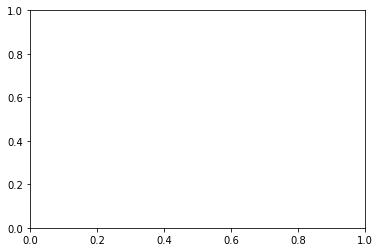

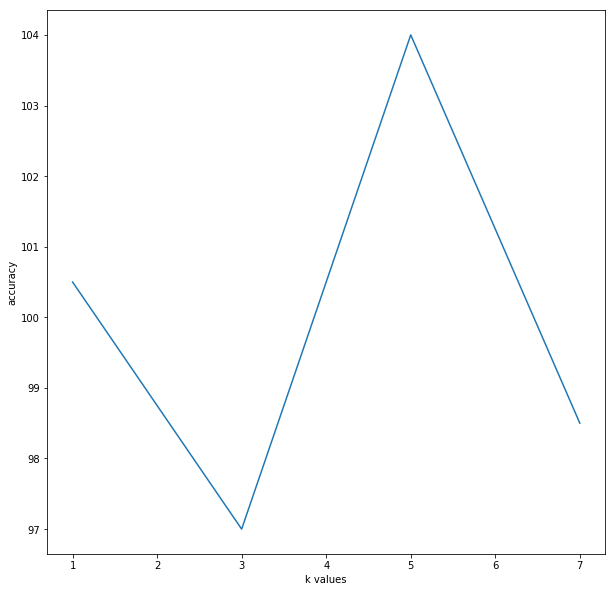

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
g=np.array([0.5,-3,+4,-1.5])
tempr = y*100+g
plt.plot([1,3,5,7],np.asarray(tempr).reshape(-1))
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()